# Another 1D GP Example

We generate realizations of a simple one dimensional Gaussian Process with zero mean and Matern covariance. Then we use the LaplaceInterpolation procedure to produce the interpolation.

In [2]:
using GaussianProcesses, LaplaceInterpolation, Random, LinearAlgebra, Plots
Random.seed!(20140430);

In [5]:
function get_gp(ν, ll, lσ)
    kern = Matern(ν, ll, lσ)                   
    # We will use no observation noise here for the purposes of generating data
    return GP(x, y, MeanZero(), kern)
end

function gprealiz(x, y, ν, ll, lσ, nrealiz = 1)
    kern = Matern(ν, ll, lσ)                   
    # We will use no observation noise here for the purposes of generating data
    gp = GP(x, y, MeanZero(), kern)
    # Generate realizations of the data. It is given as μ + σLV, where L is the Cholesky factor of K
    # and V is drawn from an iid N(0,1) distribution
    μ, Σ = predict_f(gp, collect(1.0:m), full_cov = true)
    L = cholesky(Σ)
    realiz = zeros(m, nrealiz)
    for i in 1:nrealiz
        realiz[:, i] = μ + L.L * randn(m)
    end
    return realiz
end

gprealiz (generic function with 2 methods)

In [6]:
# Training data
n = 10
m = 2 * n
v = Float64.(randperm(m))
x = sort(v[1:n])
y = sin.(2π * x * 0.1) + 0.05*randn(n)

# The Matern parameters are set on a log scale
ν = 1.5
ll = 0.5
lσ = 0.0 #0.05
nrealiz = 100

realiz = gprealiz(x, y, ν, ll, lσ, nrealiz)

20×100 Array{Float64,2}:
 -0.0341668   0.828377    0.559466   …   0.66349    1.34677      0.988641
  1.12301     0.952341    0.950888       0.829389   0.800295     0.875031
  0.614095    0.792402    0.712408       1.63951    1.46357      1.53862
  0.374343    0.706474    0.373574       0.948067   1.83945      1.47826
 -0.246072   -0.364779    0.393877       0.24134    0.0822869    0.873668
 -0.438038   -0.446659   -0.612604   …  -0.518686  -0.5453      -0.52266
 -1.03547    -1.0684     -1.02363       -0.83958   -1.09798     -1.23245
 -0.890603   -1.10247    -0.780036      -1.0075    -0.886708    -0.950708
 -0.339407   -0.478443    0.0352055     -0.205909  -0.879897    -1.02021
 -0.180004    0.0907154  -0.206415      -0.17075   -0.00624758   0.124333
 -0.257696    0.190188   -0.906344   …  -1.17849   -0.00653454   0.47374
 -0.622344   -1.71041    -1.95346       -0.840201   1.00541     -0.451394
  0.298758   -1.40491    -0.0735562      0.146787   0.417657     0.258273
  1.01117    -0.129

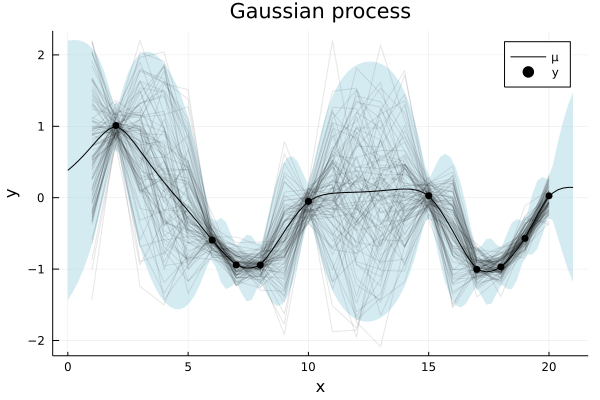

In [7]:
gp = get_gp(ν, ll, lσ)
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=true, label = ["μ" "y"],
        xlim = [0,21]) 
plot!(realiz, c = RGBA(0,0,0,0.1), label = "")

In [13]:
h = k = 1.0
discard = Int64.(v[(n+1):m])

y_lap = matern_1d_grid(y, discard, 1, 0.0, h)
d = 1
m = 2 # nu + d/2
# m = dimension/2+nu
# epsilon = sqrt(2*nu)/length_scale
epsilon = sqrt(3)/exp(ll)

y_mat = matern_1d_grid(y, discard, m, epsilon, h, k)

LoadError: [91mBoundsError: attempt to access 10×10 SparseArrays.SparseMatrixCSC{Bool,Int64} at index [[4, 16, 13, 1, 11, 9, 14, 12, 3, 5], [4, 16, 13, 1, 11, 9, 14, 12, 3, 5]][39m